In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hepatitis = pd.read_csv('hepatitis.data', dtype='object',na_values='?')
hepatitis.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [3]:
hepatitis = hepatitis.replace({"Class":{'1': '0', '2': '1'}})

In [4]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    object
 1   AGE              155 non-null    object
 2   SEX              155 non-null    object
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       155 non-null    object
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER_BIG        145 non-null    object
 9   LIVER_FIRM       144 non-null    object
 10  SPLEEN_PALPABLE  150 non-null    object
 11  SPIDERS          150 non-null    object
 12  ASCITES          150 non-null    object
 13  VARICES          150 non-null    object
 14  BILIRUBIN        149 non-null    object
 15  ALK_PHOSPHATE    126 non-null    object
 16  SGOT             151 non-null    object
 17  ALBUMIN          139 non-null    ob

In [5]:
hepatitis.AGE = hepatitis.AGE.astype('int64')
hepatitis.BILIRUBIN = hepatitis.BILIRUBIN.astype('float64')
hepatitis.ALK_PHOSPHATE = hepatitis.ALK_PHOSPHATE.astype('float64')
hepatitis.SGOT = hepatitis.SGOT.astype('float64')
hepatitis.ALBUMIN = hepatitis.ALBUMIN.astype('float64')
hepatitis.PROTIME = hepatitis.PROTIME.astype('float64')

In [6]:
 hepatitis.isnull().sum()  

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [7]:
dfn = hepatitis[['PROTIME','ALBUMIN','SGOT','ALK_PHOSPHATE','BILIRUBIN']]
dfn = dfn.fillna(dfn.mean())
dfn

,PROTIME,ALBUMIN,SGOT,ALK_PHOSPHATE,BILIRUBIN
0,61.852273,4.0,18.0,85.000000,1.0
1,61.852273,3.5,42.0,135.000000,0.9
2,61.852273,4.0,32.0,96.000000,0.7
3,80.000000,4.0,52.0,46.000000,0.7
4,61.852273,4.0,200.0,105.325397,1.0
...,...,...,...,...,...
150,50.000000,3.3,242.0,105.325397,7.6
151,61.852273,4.3,142.0,126.000000,0.9
152,61.852273,4.1,20.0,75.000000,0.8
153,48.000000,4.1,19.0,81.000000,1.5


In [8]:
dfc = hepatitis[['STEROID','FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE','SPIDERS','ASCITES','VARICES']]
dfc = dfc.fillna(dfc.mode().iloc[0])
dfc

,STEROID,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES
0,1,2,2,2,1,2,2,2,2,2
1,1,1,2,2,1,2,2,2,2,2
2,2,1,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
150,2,1,1,1,2,2,2,1,1,1
151,2,1,2,2,2,1,2,2,2,2
152,1,1,1,2,1,1,2,1,2,2
153,1,1,2,2,2,2,1,1,2,1


In [9]:
hepatitis = pd.concat([hepatitis[['Class' , 'AGE' , 'SEX' , 'HISTOLOGY' , 'ANTIVIRALS']],dfn, dfc],axis=1)
hepatitis

,Class,AGE,SEX,HISTOLOGY,ANTIVIRALS,PROTIME,ALBUMIN,SGOT,ALK_PHOSPHATE,BILIRUBIN,STEROID,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES
0,1,30,2,1,2,61.852273,4.0,18.0,85.000000,1.0,1,2,2,2,1,2,2,2,2,2
1,1,50,1,1,2,61.852273,3.5,42.0,135.000000,0.9,1,1,2,2,1,2,2,2,2,2
2,1,78,1,1,2,61.852273,4.0,32.0,96.000000,0.7,2,1,2,2,2,2,2,2,2,2
3,1,31,1,1,1,80.000000,4.0,52.0,46.000000,0.7,2,2,2,2,2,2,2,2,2,2
4,1,34,1,1,2,61.852273,4.0,200.0,105.325397,1.0,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,46,1,2,2,50.000000,3.3,242.0,105.325397,7.6,2,1,1,1,2,2,2,1,1,1
151,1,44,1,2,2,61.852273,4.3,142.0,126.000000,0.9,2,1,2,2,2,1,2,2,2,2
152,1,61,1,2,2,61.852273,4.1,20.0,75.000000,0.8,1,1,1,2,1,1,2,1,2,2
153,1,53,2,2,2,48.000000,4.1,19.0,81.000000,1.5,1,1,2,2,2,2,1,1,2,1


In [10]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    object 
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    object 
 3   HISTOLOGY        155 non-null    object 
 4   ANTIVIRALS       155 non-null    object 
 5   PROTIME          155 non-null    float64
 6   ALBUMIN          155 non-null    float64
 7   SGOT             155 non-null    float64
 8   ALK_PHOSPHATE    155 non-null    float64
 9   BILIRUBIN        155 non-null    float64
 10  STEROID          155 non-null    object 
 11  FATIGUE          155 non-null    object 
 12  MALAISE          155 non-null    object 
 13  ANOREXIA         155 non-null    object 
 14  LIVER_BIG        155 non-null    object 
 15  LIVER_FIRM       155 non-null    object 
 16  SPLEEN_PALPABLE  155 non-null    object 
 17  SPIDERS         

In [11]:
hepatitis.nunique()

Class               2
AGE                49
SEX                 2
HISTOLOGY           2
ANTIVIRALS          2
PROTIME            45
ALBUMIN            30
SGOT               85
ALK_PHOSPHATE      84
BILIRUBIN          35
STEROID             2
FATIGUE             2
MALAISE             2
ANOREXIA            2
LIVER_BIG           2
LIVER_FIRM          2
SPLEEN_PALPABLE     2
SPIDERS             2
ASCITES             2
VARICES             2
dtype: int64

In [12]:
hepatitis.describe(include=object)

,Class,SEX,HISTOLOGY,ANTIVIRALS,STEROID,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES
count,155,155,155,155,155,155,155,155,155,155,155,155,155,155
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,1,1,1,2,2,1,2,2,2,2,2,2,2,2
freq,123,139,85,131,79,101,94,123,130,95,125,104,135,137


In [13]:
hepatitis.describe()

,AGE,PROTIME,ALBUMIN,SGOT,ALK_PHOSPHATE,BILIRUBIN
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,61.852273,3.817266,85.894040,105.325397,1.427517
std,12.565878,17.193528,0.616750,88.478932,46.405585,1.188301
min,7.000000,0.000000,2.100000,14.000000,26.000000,0.300000
25%,32.000000,57.000000,3.500000,32.500000,78.000000,0.800000
50%,39.000000,61.852273,3.900000,59.000000,102.000000,1.000000
75%,50.000000,65.000000,4.200000,99.000000,119.500000,1.500000
max,78.000000,100.000000,6.400000,648.000000,295.000000,8.000000


In [14]:
hepatitis.corr(numeric_only=True)

,AGE,PROTIME,ALBUMIN,SGOT,ALK_PHOSPHATE,BILIRUBIN
AGE,1.000000,-0.153312,-0.246169,0.081052,0.008076,0.122884
PROTIME,-0.153312,1.000000,0.301497,-0.137698,-0.189331,-0.220977
ALBUMIN,-0.246169,0.301497,1.000000,-0.115455,-0.338158,-0.370712
SGOT,0.081052,-0.137698,-0.115455,1.000000,0.193969,0.232610
ALK_PHOSPHATE,0.008076,-0.189331,-0.338158,0.193969,1.000000,0.157982
BILIRUBIN,0.122884,-0.220977,-0.370712,0.232610,0.157982,1.000000


In [15]:
# sns.pairplot(data=hepatitis, hue='Class')

In [16]:
hepatitis

,Class,AGE,SEX,HISTOLOGY,ANTIVIRALS,PROTIME,ALBUMIN,SGOT,ALK_PHOSPHATE,BILIRUBIN,STEROID,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES
0,1,30,2,1,2,61.852273,4.0,18.0,85.000000,1.0,1,2,2,2,1,2,2,2,2,2
1,1,50,1,1,2,61.852273,3.5,42.0,135.000000,0.9,1,1,2,2,1,2,2,2,2,2
2,1,78,1,1,2,61.852273,4.0,32.0,96.000000,0.7,2,1,2,2,2,2,2,2,2,2
3,1,31,1,1,1,80.000000,4.0,52.0,46.000000,0.7,2,2,2,2,2,2,2,2,2,2
4,1,34,1,1,2,61.852273,4.0,200.0,105.325397,1.0,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,46,1,2,2,50.000000,3.3,242.0,105.325397,7.6,2,1,1,1,2,2,2,1,1,1
151,1,44,1,2,2,61.852273,4.3,142.0,126.000000,0.9,2,1,2,2,2,1,2,2,2,2
152,1,61,1,2,2,61.852273,4.1,20.0,75.000000,0.8,1,1,1,2,1,1,2,1,2,2
153,1,53,2,2,2,48.000000,4.1,19.0,81.000000,1.5,1,1,2,2,2,2,1,1,2,1


# Feature_Importances

In [17]:
X = hepatitis.drop('Class', axis=1)
y = hepatitis['Class']

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyper_params = {"n_estimators": [20,30,40,50,60,70], "max_leaf_nodes": [7,8,9]}

clf = GridSearchCV(RandomForestClassifier(), param_grid=hyper_params, cv=20)
clf.fit(X, y)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [7, 8, 9],
                         'n_estimators': [20, 30, 40, 50, 60, 70]})

In [19]:
print(clf.best_estimator_)

RandomForestClassifier(max_leaf_nodes=8, n_estimators=70)


In [20]:
clf = RandomForestClassifier(max_leaf_nodes=9, n_estimators=50).fit(X, y)
feature_importan = pd.DataFrame(data=clf.feature_importances_, index=X.columns)
feature_importan = feature_importan.sort_values(by=0, ascending=False)[0:11]
feature_importan

,0
ALBUMIN,0.211588
BILIRUBIN,0.133305
ALK_PHOSPHATE,0.101250
PROTIME,0.094525
AGE,0.087795
ASCITES,0.075110
SPIDERS,0.053661
VARICES,0.044440
MALAISE,0.041590
SGOT,0.038367


In [21]:
fe =feature_importan.index
data=hepatitis[fe]
data = pd.concat([hepatitis[['Class']],data],axis=1)
data

,Class,ALBUMIN,BILIRUBIN,ALK_PHOSPHATE,PROTIME,AGE,ASCITES,SPIDERS,VARICES,MALAISE,SGOT,HISTOLOGY
0,1,4.0,1.0,85.000000,61.852273,30,2,2,2,2,18.0,1
1,1,3.5,0.9,135.000000,61.852273,50,2,2,2,2,42.0,1
2,1,4.0,0.7,96.000000,61.852273,78,2,2,2,2,32.0,1
3,1,4.0,0.7,46.000000,80.000000,31,2,2,2,2,52.0,1
4,1,4.0,1.0,105.325397,61.852273,34,2,2,2,2,200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
150,0,3.3,7.6,105.325397,50.000000,46,1,1,1,1,242.0,2
151,1,4.3,0.9,126.000000,61.852273,44,2,2,2,2,142.0,2
152,1,4.1,0.8,75.000000,61.852273,61,2,1,2,1,20.0,2
153,1,4.1,1.5,81.000000,48.000000,53,2,1,1,2,19.0,2


# Split

In [22]:
X = data.drop('Class', axis=1)
y = data['Class'].astype(int)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier , Perceptron
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report
from sklearn.metrics import  roc_curve,top_k_accuracy_score ,precision_score

# SVC

In [26]:
m1 = 'SVC'
svc = make_pipeline(StandardScaler(), SVC())
svc_gridSearch = GridSearchCV(svc, param_grid={'svc__gamma': [0.001, 0.01, 0.1, 1, 10,100], 
                                                'svc__C': [0.1, 1, 10, 100]}, scoring='precision')

svc_gridSearch.fit(X_train, y_train)
svc_predicted = svc_gridSearch.predict(X_test)

print("confussion matrix")
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
print(svc_conf_matrix)

print("\n")

print("precision_score")
print(round(precision_score(y_test, svc_predicted),2) )


confussion matrix
[[ 1  5]
 [ 2 23]]


precision_score
0.82


# Logistic Regression

In [33]:
m2 = 'Logistic Regression'
log = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression()),
                    param_grid={'logisticregression__C': [0.1, 10,100,500]},
                    cv=2)
log.fit(X_train, y_train)
log_predict = log.predict(X_test)

print("confussion matrix")
log_conf_matrix = confusion_matrix(y_test, log_predict)
print(log_conf_matrix)

print("\n")

print("precision_score")
print(round(precision_score(y_test, log_predict),2) )


confussion matrix
[[ 2  4]
 [ 2 23]]


precision_score
0.85


# Naive Bayes

In [34]:
m3 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)

print("confussion matrix")
nbpred_conf_matrix = confusion_matrix(y_test, nbpred)
print(nbpred_conf_matrix)

print("\n")

print("precision_score")
print(round(precision_score(y_test, nbpred),2) )

confussion matrix
[[ 5  1]
 [ 5 20]]


precision_score
0.95


# KNN

In [35]:
m4 = 'K-NeighborsClassifier'
knn =KNeighborsClassifier()
k_range = list(range(1,50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
# grid = GridSearchCV(knn, param_grid, cv=5) 
grid_search=grid.fit(X_train, y_train)
knn_predicted = grid_search.predict(X_test)


print("confussion matrix")
knn_predicted_conf_matrix = confusion_matrix(y_test, knn_predicted)
print(knn_predicted_conf_matrix)

print("\n")

print("precision_score")
print(round(precision_score(y_test, knn_predicted),2) )


Fitting 2 folds for each of 49 candidates, totalling 98 fits
confussion matrix
[[ 0  6]
 [ 0 25]]


precision_score
0.81


# Perceptron

In [36]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grids = dict()
grids['eta0'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
search = GridSearchCV(Perceptron(), grids, scoring='accuracy', cv=cv, n_jobs=-1)
search.fit(X_train, y_train)
y_predict_perceptron = search.predict(X_test)

print("confussion matrix")
Perceptron_predicted_conf_matrix = confusion_matrix(y_test, y_predict_perceptron)
print(Perceptron_predicted_conf_matrix)

print("\n")

print("precision_score")
print(round(precision_score(y_test, y_predict_perceptron),2) )



confussion matrix
[[ 6  0]
 [25  0]]


precision_score
0.0


/home/cmos/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Stacking

In [31]:
stacking_clf = StackingClassifier(
estimators=[
# ('svc', svc_gridSearch),
('log', log),
('bn',nb),
('knn', grid),
# ('perceptron', search),    
],
final_estimator=RandomForestClassifier(),
cv=5 # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

y_predict_stacking = stacking_clf.predict(X_test)

print("confussion matrix")
stacking_predicted_conf_matrix = confusion_matrix(y_test, y_predict_stacking)
print(Perceptron_predicted_conf_matrix)

print("\n")

print("precision_score")
print(round(precision_score(y_test, y_predict_stacking),2) )


Fitting 2 folds for each of 49 candidates, totalling 98 fits
Fitting 2 folds for each of 49 candidates, totalling 98 fits
Fitting 2 folds for each of 49 candidates, totalling 98 fits
Fitting 2 folds for each of 49 candidates, totalling 98 fits
Fitting 2 folds for each of 49 candidates, totalling 98 fits
Fitting 2 folds for each of 49 candidates, totalling 98 fits
confussion matrix
[[ 6  0]
 [25  0]]


precision_score
0.86


# ROC

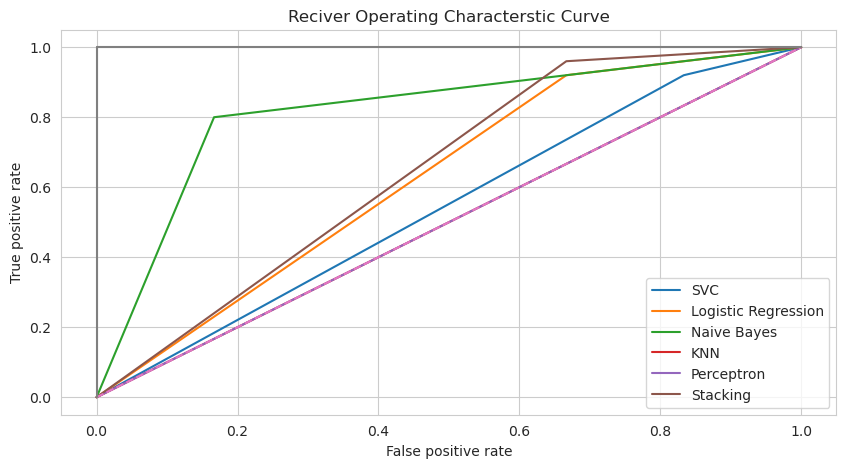

In [32]:
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,log_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
perc_false_positive_rate,perc_true_positive_rate,perc_threshold = roc_curve(y_test,y_predict_perceptron)
stack_false_positive_rate,stack_true_positive_rate,stack_threshold = roc_curve(y_test,y_predict_stacking)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='SVC')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='KNN')
plt.plot(perc_false_positive_rate,perc_true_positive_rate,label='Perceptron')
plt.plot(stack_false_positive_rate,stack_true_positive_rate,label='Stacking')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()